# Introduction
This homework is an exercise on graph data, where you will create a graph, find non-overlapping communities, and print them. This is the last homework in that course.


BogCLAM method needs to run on a Cloud machine in Linux environment; we will run it in the next Big Data Analytics course.

 
# Tasks
1. Unzip that small collection of paper, and extract a list of co-authors (you can use a helper function given below).
2. Create a graph in "networkx" package that links all co-authors of a paper together. Remember that you need a link for each combination of two different co-authors!
3. Find non-overlapping communities with a build-in function "from networkx.algorithms.community import greedy_modularity_communities"
4. Get an adjacency matrix of the original graph, and aligned according to the communities that you found (hint: look at parameters of "networkx.adjacency_matrix()" function)
5. Print those two matrices using "matplotlib.spy()" or any other printing method. For "matplotlib.spy()" you may need to adjust "markersize" parameter.

In [7]:
# Packages

import networkx as nx
import xml.etree.ElementTree as ET
import glob
import errno
import numpy as np
import pandas as pd
from nxviz.plots import CircosPlot
from itertools import combinations
import matplotlib.pyplot as plt
from networkx.algorithms.community import greedy_modularity_communities

In [8]:
def get_authors(filename):
    coauthors = []
    e = ET.parse(filename)
    for author in e.getroot().iter("contrib"):
        if 'author' in author.attrib.values():
            namenode = author.find("name")
            if namenode is not None:
                try:
                    surname = namenode.find("surname").text
                except AttributeError:
                    continue  # skip authors with no surname
                try:
                    givenname = namenode.find("given-names").text
                except AttributeError:
                    givenname = "Unknown"  # ignore missing first names
                fullname = "%s %s" % (givenname, surname)
                coauthors.append(fullname.encode('utf-8').decode('utf-8'))
    return coauthors


In [9]:
path = "Acad_Med/*.nxml"
files = glob.glob(path)
data=[]
for name in files:
    try:
        with open(name) as f:
            da=get_authors(f)
            data.append(da)
    except IOError as exc:
        if exc.errno != errno.EISDIR:
            raise

In [10]:
print(data)

[['Muthiah Vaduganathan', 'Jasmine Rassiwala', 'Jessica Evert'], ['Marcelo Schweller', 'Felipe Osorio Costa', 'Maria Ângela R.G.M. Antônio', 'Eliana M. Amaral', 'Marco Antonio de Carvalho-Filho'], ['Jochanan Benbassat'], ['Jennifer C. Kesselheim', 'Pengling Sun', 'Alan D. Woolf', 'Wendy B. London', 'Debra Boyer'], ['Peter G. Szilagyi', 'Laura P. Shone', 'Ann M. Dozier', 'Gail L. Newton', 'Theresa Green', 'Nancy M. Bennett'], ['Linda A. Headrick', 'Greg Ogrinc', 'Kimberly G. Hoffman', 'Katherine M. Stevenson', 'Marc Shalaby', 'Albertine S. Beard', 'Karin E. Thörne', 'Mary T. Coleman', 'Karyn D. Baum'], ['John R. Raymond', 'Joseph E. Kerschner', 'William J. Hueston', 'Cheryl A. Maurana'], ['H.G.A. Ria Jochemsen-van der Leeuw', 'Nynke van Dijk', 'Margreet Wieringa-de Waard'], ['Vivian S. Lee', 'Thomas Miller', 'Chrissy Daniels', 'Marilynn Paine', 'Brian Gresh', 'A. Lorris Betz'], ['Lisa K. Allen-Scott', 'Bonnie Buntain', 'Jennifer M. Hatfield', 'Andrea Meisser', 'Christopher James Thomas'

In [11]:
author_connections = list(
    map(lambda x: list(combinations(x[::-1], 2)), data))
print(author_connections)

[[('Jessica Evert', 'Jasmine Rassiwala'), ('Jessica Evert', 'Muthiah Vaduganathan'), ('Jasmine Rassiwala', 'Muthiah Vaduganathan')], [('Marco Antonio de Carvalho-Filho', 'Eliana M. Amaral'), ('Marco Antonio de Carvalho-Filho', 'Maria Ângela R.G.M. Antônio'), ('Marco Antonio de Carvalho-Filho', 'Felipe Osorio Costa'), ('Marco Antonio de Carvalho-Filho', 'Marcelo Schweller'), ('Eliana M. Amaral', 'Maria Ângela R.G.M. Antônio'), ('Eliana M. Amaral', 'Felipe Osorio Costa'), ('Eliana M. Amaral', 'Marcelo Schweller'), ('Maria Ângela R.G.M. Antônio', 'Felipe Osorio Costa'), ('Maria Ângela R.G.M. Antônio', 'Marcelo Schweller'), ('Felipe Osorio Costa', 'Marcelo Schweller')], [], [('Debra Boyer', 'Wendy B. London'), ('Debra Boyer', 'Alan D. Woolf'), ('Debra Boyer', 'Pengling Sun'), ('Debra Boyer', 'Jennifer C. Kesselheim'), ('Wendy B. London', 'Alan D. Woolf'), ('Wendy B. London', 'Pengling Sun'), ('Wendy B. London', 'Jennifer C. Kesselheim'), ('Alan D. Woolf', 'Pengling Sun'), ('Alan D. Woolf',

In [12]:
single_connection= [item for sublist in author_connections for item in sublist]
print(single_connection)

[('Jessica Evert', 'Jasmine Rassiwala'), ('Jessica Evert', 'Muthiah Vaduganathan'), ('Jasmine Rassiwala', 'Muthiah Vaduganathan'), ('Marco Antonio de Carvalho-Filho', 'Eliana M. Amaral'), ('Marco Antonio de Carvalho-Filho', 'Maria Ângela R.G.M. Antônio'), ('Marco Antonio de Carvalho-Filho', 'Felipe Osorio Costa'), ('Marco Antonio de Carvalho-Filho', 'Marcelo Schweller'), ('Eliana M. Amaral', 'Maria Ângela R.G.M. Antônio'), ('Eliana M. Amaral', 'Felipe Osorio Costa'), ('Eliana M. Amaral', 'Marcelo Schweller'), ('Maria Ângela R.G.M. Antônio', 'Felipe Osorio Costa'), ('Maria Ângela R.G.M. Antônio', 'Marcelo Schweller'), ('Felipe Osorio Costa', 'Marcelo Schweller'), ('Debra Boyer', 'Wendy B. London'), ('Debra Boyer', 'Alan D. Woolf'), ('Debra Boyer', 'Pengling Sun'), ('Debra Boyer', 'Jennifer C. Kesselheim'), ('Wendy B. London', 'Alan D. Woolf'), ('Wendy B. London', 'Pengling Sun'), ('Wendy B. London', 'Jennifer C. Kesselheim'), ('Alan D. Woolf', 'Pengling Sun'), ('Alan D. Woolf', 'Jennife

In [14]:
data = pd.DataFrame(single_connection, columns=["From", "To"])
data.head(5)

,From,To
0,Jessica Evert,Jasmine Rassiwala
1,Jessica Evert,Muthiah Vaduganathan
2,Jasmine Rassiwala,Muthiah Vaduganathan
3,Marco Antonio de Carvalho-Filho,Eliana M. Amaral
4,Marco Antonio de Carvalho-Filho,Maria Ângela R.G.M. Antônio


In [16]:
df_graph = data.groupby(["From", "To"]).size().reset_index()
df_graph.columns = ["From", "To", "Count"]
df_graph.head(5)

,From,To,Count
0,A. Hal Strelnick,Anne Kissack,1
1,A. Hal Strelnick,Bernice B. Rumala,1
2,A. Hal Strelnick,Carol Ferrans,1
3,A. Hal Strelnick,Davera Gabriel,1
4,A. Hal Strelnick,Giselle Corbie-Smith,1


In [18]:
G = nx.from_pandas_edgelist(
    df_graph, source="From", target="To", edge_attr="Count")

print(len(G.edges()))
print(len(G.nodes()))

588
191


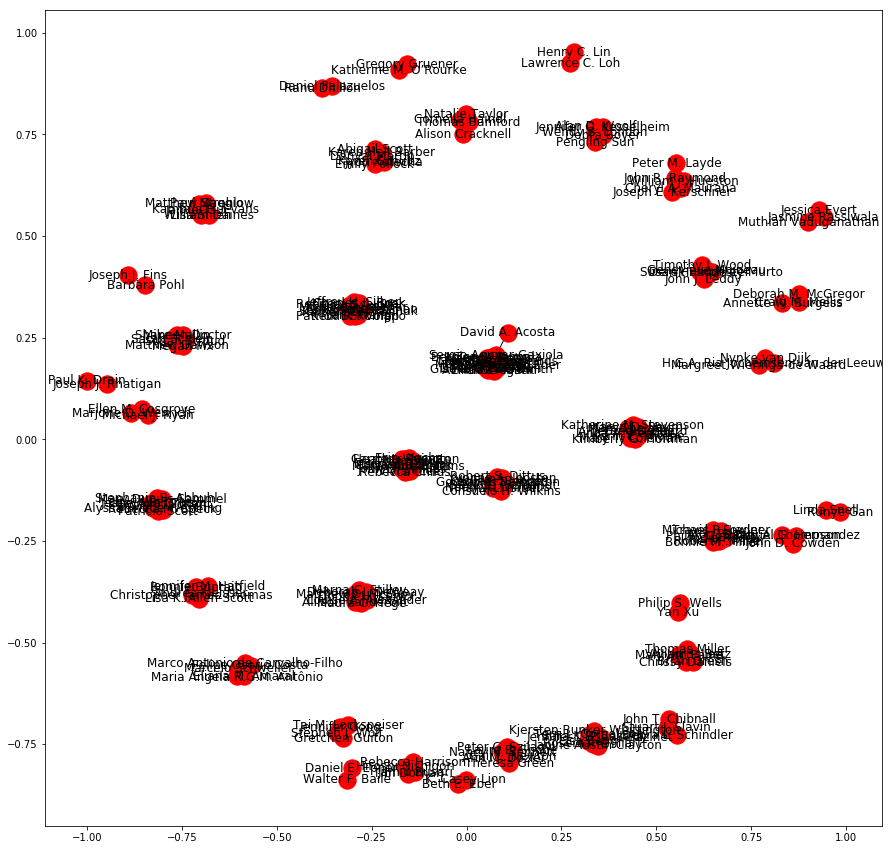

In [19]:
plt.figure(figsize=(15,15))
nx.draw_networkx(G, with_labels=True)
plt.show()

In [21]:
deg = nx.degree_centrality(G)
bet = nx.betweenness_centrality(G)
#print(deg)

In [77]:
c = list(greedy_modularity_communities(G))

In [78]:
sorted(c[0])

['A. Hal Strelnick',
 'Anne Kissack',
 'Bernice B. Rumala',
 'Carol Ferrans',
 'Davera Gabriel',
 'David A. Acosta',
 'Giselle Corbie-Smith',
 'Karen Calhoun',
 'Karen Hacker',
 'Linda Ziegahn',
 'Lori Carter-Edwards',
 'Milton “Mickey” Eder',
 'Nancy J. Bates',
 'Nina Wallerstein',
 'Sergio Aguilar-Gaxiola',
 'Syed Ahmed',
 'Thelma Hurd',
 'Zeno Franco']

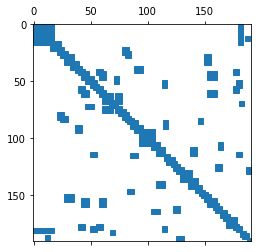

In [79]:
A = nx.adjacency_matrix(G)
plt.spy(A, markersize=5)
plt.show()